In [10]:
import urllib.request
import os
import pandas as pd
import numpy as np
import csv
from math import radians, cos, sin, asin, sqrt
import geopandas as gpd

## FHV Data

### Merge FHV data and location coordinates data

In [2]:
#create the folders
if not os.path.exists('/FHV'):
    !mkdir FHV

In [ ]:
#download FHV data 
for year in [2020, 2019]: 
    for month in range(1,13):
        
        file = 'fhv_tripdata_'+str(year)+'-'+str(month).zfill(2)+'.csv'
        if not os.path.exists('Data-Dive-2021/FHV/'+file):
            url = 'https://nyc-tlc.s3.amazonaws.com/trip+data/'+file
            urllib.request.urlretrieve(url,'Data-Dive-2021/FHV/'+file)
            
print('done')

In [96]:
#concatenate all the files into a single dataframe
files = os.listdir('./FHV/')
dfList = []

for index,filename in enumerate(files):
    if '.csv' in filename:
        if index == 0:
            df = pd.read_csv('./FHV/'+filename, index_col=None)
        else:
            df = pd.read_csv('./FHV/'+filename, index_col=None, header=0)
        dfList.append(df)
FHV = pd.concat(dfList, axis=0, ignore_index=True)

In [3]:
print(len(FHV))
print(max(pd.to_datetime(FHV['pickup_datetime'])))

36631263
2020-12-31 23:59:35


In [4]:
# location data with longitudes and latitudes
points = pd.read_csv('samplePoints.csv')
points.dropna()
points.head()

,LocationID,lon_pickup,lat_pickup,LocationID2,lon_dropoff,lat_dropoff
0,1,-74.174000,40.691831,145,-73.948891,40.745379
1,2,-73.831299,40.616745,203,-73.739473,40.657853
2,3,-73.847422,40.864474,77,-73.895364,40.666559
3,4,-73.976968,40.723752,158,-74.008984,40.735035
4,5,-74.188484,40.552659,123,-73.964334,40.599954


In [20]:
# merge
FHV = FHV.merge(points[['LocationID', 'lon_pickup', 'lat_pickup']], 
                   left_on = 'PULocationID', right_on= 'LocationID')
FHV = FHV.merge(points[['LocationID2', 'lon_dropoff', 'lat_dropoff']], 
                   left_on = 'DOLocationID', right_on= 'LocationID2')
FHV.head()

,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,Unnamed: 0,LocationID,lon_pickup,lat_pickup,LocationID2,lon_dropoff,lat_dropoff
0,B00021,2019-12-01 00:52:19,2019-12-01 00:59:39,56.0,56.0,NaN,NaN,56,-73.858845,40.741407,56,-73.858845,40.741407
1,B00021,2019-12-01 00:52:19,2019-12-01 00:59:39,56.0,56.0,NaN,NaN,56,-73.858845,40.741407,56,-73.853582,40.751819
2,B00021,2019-12-01 00:52:19,2019-12-01 00:59:39,56.0,56.0,NaN,NaN,56,-73.853582,40.751819,56,-73.858845,40.741407
3,B00021,2019-12-01 00:52:19,2019-12-01 00:59:39,56.0,56.0,NaN,NaN,56,-73.853582,40.751819,56,-73.853582,40.751819
4,B00021,2019-12-01 00:34:27,2019-12-01 00:42:22,56.0,56.0,NaN,NaN,56,-73.858845,40.741407,56,-73.858845,40.741407


In [7]:
len(FHV)

7517888

In [13]:
taxizone = gpd.read_file('taxizone.geojson')
taxizone

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314414156821,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000111871946192,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000497957489363,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."
...,...,...,...,...,...,...,...
258,0.000168611097013,256,0.0679149669603,256,Williamsburg (South Side),Brooklyn,"MULTIPOLYGON (((-73.95834 40.71331, -73.95681 ..."
259,0.000394552487366,259,0.126750305191,259,Woodlawn/Wakefield,Bronx,"MULTIPOLYGON (((-73.85107 40.91037, -73.85207 ..."
260,0.000422345326907,260,0.133514154636,260,Woodside,Queens,"MULTIPOLYGON (((-73.90175 40.76078, -73.90147 ..."
261,0.0000343423231652,261,0.0271204563616,261,World Trade Center,Manhattan,"MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ..."


In [ ]:
# merge
FHV = FHV.merge(points[['location_id', 'lon_pickup', 'lat_pickup']], 
                   left_on = 'PULocationID', right_on= 'LocationID')
FHV = FHV.merge(points[['location_id', 'lon_dropoff', 'lat_dropoff']], 
                   left_on = 'DOLocationID', right_on= 'LocationID2')
FHV.head()

In [101]:
# save raw data
pd.DataFrame(FHV).to_csv('FHVraw.csv',index=False)
print('File saved.')

File saved.


### Process FHVraw data to get the features we need.

In [71]:
# caculate distance with MapReduce

def returnInfo(record): #extract necessary fields from a data record (raw)
    count = 1
    return(record['pickup_datetime'],record['dropoff_datetime'],count,
           record['lon_pickup'],record['lat_pickup'],record['lon_dropoff'],record['lat_dropoff'])

def haversine(record): 
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # longitudes & latitudes
    lon1, lat1, lon2, lat2 = map(radians, [float(record[3]), float(record[4]), float(record[5]), float(record[6])])
 
    # haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # kilometer
    distance = c * r 
    
    return(record[0],record[1],record[2],distance)


In [72]:
with open('FHVraw.csv', 'r') as f:
    reader = csv.DictReader(f)
    output = list(map(haversine, map(returnInfo, reader)))
output[:5]

[('2019-12-01 00:52:19', '2019-12-01 00:59:39', 1, 0.0),
 ('2019-12-01 00:52:19', '2019-12-01 00:59:39', 1, 1.2398336133055488),
 ('2019-12-01 00:52:19', '2019-12-01 00:59:39', 1, 1.2398336133055488),
 ('2019-12-01 00:52:19', '2019-12-01 00:59:39', 1, 0.0),
 ('2019-12-01 00:34:27', '2019-12-01 00:42:22', 1, 0.0)]

In [73]:
FHV = pd.DataFrame(output, columns=['pickup_datetime','dropoff_datetime','Num_trips','Distance'])
FHV.head()

,pickup_datetime,dropoff_datetime,Num_trips,Distance
0,2019-12-01 00:52:19,2019-12-01 00:59:39,1,0.000000
1,2019-12-01 00:52:19,2019-12-01 00:59:39,1,1.239834
2,2019-12-01 00:52:19,2019-12-01 00:59:39,1,1.239834
3,2019-12-01 00:52:19,2019-12-01 00:59:39,1,0.000000
4,2019-12-01 00:34:27,2019-12-01 00:42:22,1,0.000000


In [75]:
FHV['pickup_datetime'] = pd.to_datetime(FHV['pickup_datetime'], errors='coerce')
FHV['dropoff_datetime'] = pd.to_datetime(FHV['dropoff_datetime'], errors='coerce')
FHV['Distance'] = FHV['Distance'].astype(float)

In [76]:
#extract date, year, day of the week and hour (takes some time around half a minute)
FHV['Date'] = FHV['pickup_datetime'].dt.date
FHV['Month'] = FHV['pickup_datetime'].dt.month
FHV['Year'] = FHV['pickup_datetime'].dt.year
FHV['DOW'] = FHV['pickup_datetime'].dt.dayofweek
FHV['Hour'] = FHV['pickup_datetime'].dt.hour

In [77]:
FHV['Duration'] = (FHV['dropoff_datetime'] - FHV['pickup_datetime'])
FHV['Duration'] = FHV['Duration'].dt.total_seconds() / 60

In [78]:
# sanity filtering
FHV = FHV[(FHV['Distance']>0)&(FHV['Distance']<=100)&
           (FHV['Duration']>0)&(FHV['Duration']<=100)]
len(FHV)

6520881

In [79]:
FHV['Speed'] = FHV['Distance'] / FHV['Duration'] * 60
FHV.head()

,pickup_datetime,dropoff_datetime,Num_trips,Distance,Date,Month,Year,DOW,Hour,Duration,Speed
1,2019-12-01 00:52:19,2019-12-01 00:59:39,1,1.239834,2019-12-01,12,2019,6,0,7.333333,10.144093
2,2019-12-01 00:52:19,2019-12-01 00:59:39,1,1.239834,2019-12-01,12,2019,6,0,7.333333,10.144093
5,2019-12-01 00:34:27,2019-12-01 00:42:22,1,1.239834,2019-12-01,12,2019,6,0,7.916667,9.396634
6,2019-12-01 00:34:27,2019-12-01 00:42:22,1,1.239834,2019-12-01,12,2019,6,0,7.916667,9.396634
9,2019-12-01 00:39:00,2019-12-01 00:50:51,1,1.239834,2019-12-01,12,2019,6,0,11.850000,6.277639


In [ ]:
FHV.describe()

In [80]:
# sanity filtering
FHV = FHV[(FHV['Speed']>0)&(FHV['Speed']<=100)]
len(FHV)

6383551

In [81]:
max(FHV['Date'])

datetime.date(2020, 5, 29)

In [33]:
FHVDaily = FHV[['Year', 'Month', 'Date', 'Hour', 'Duration', 'Distance', 'Speed']]
pd.DataFrame(FHVDaily).to_csv('FHV_Daily_Maia.csv',index=False)
print('File saved.')

File saved.


## Test with Time Series Methods

In [65]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# suppress warning
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy

Daily Dataset

In [82]:
Daily = FHV.groupby('Date').agg({'Num_trips':'count', 'Duration':'mean', 'Distance':'mean', 'Speed':'mean'})
# Daily['Speed'] = Daily['Distance'] / Daily['Duration'] * 60
Daily

,Num_trips,Duration,Distance,Speed
Date,,,,
2019-01-01,619796,17.189268,5.487808,18.647033
2019-01-02,444822,18.596381,5.422298,17.099904
2019-01-03,461199,18.661216,5.163238,16.411668
2019-01-04,534826,18.429788,5.030138,16.180468
2019-01-05,644714,17.359446,4.912758,16.551915
...,...,...,...,...
2020-05-23,9,27.816667,14.294365,30.139185
2020-05-24,6,25.611111,14.285470,33.568636
2020-05-26,4,7.083333,3.104155,25.916480


In [40]:
Daily.index[400]

datetime.date(2020, 2, 29)

In [48]:
Daily.index[34]

datetime.date(2019, 2, 28)

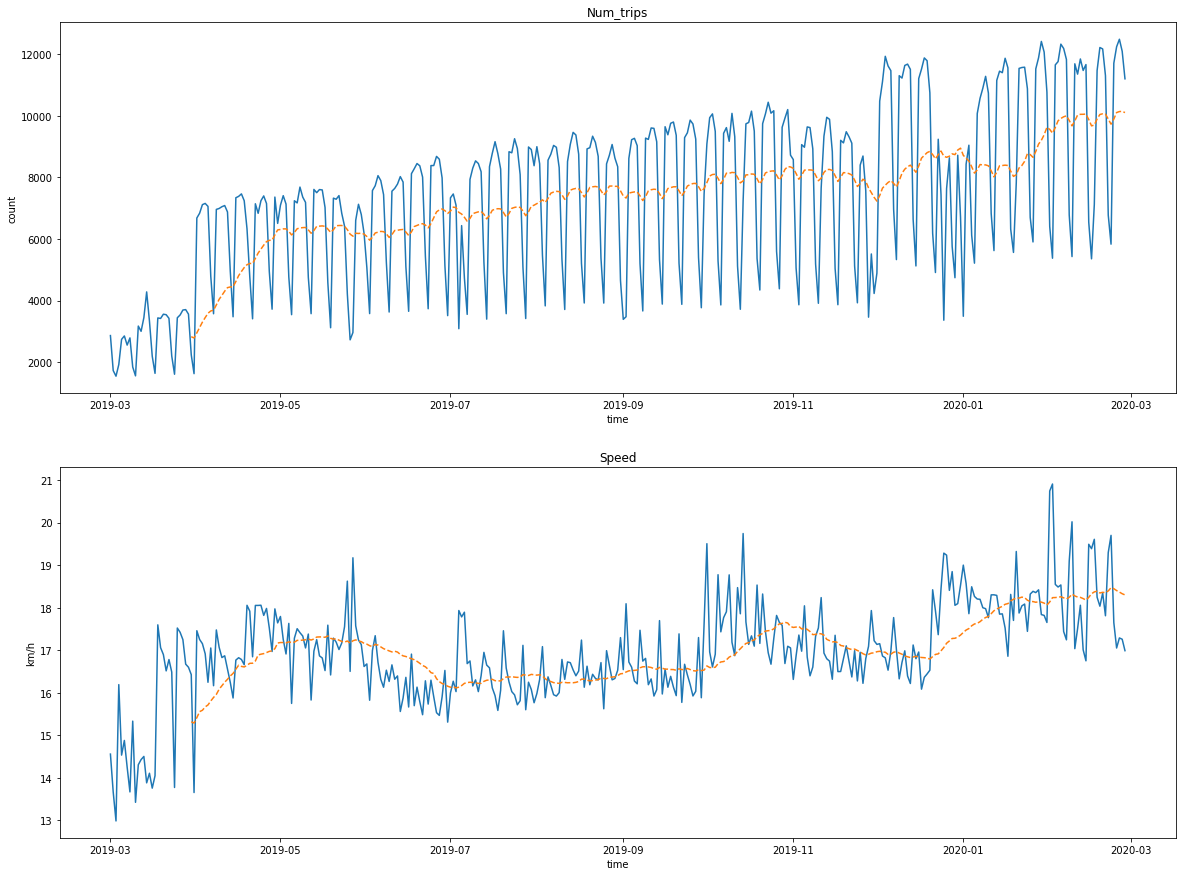

In [83]:
plt.figure(figsize = (20,15))
plt.subplot(211)
plt.title('Num_trips')
plt.xlabel('time')
plt.ylabel('count')
FHV_ata_line = plt.plot(Daily['Num_trips'].iloc[35:400])
FHV_mean_line = plt.plot(Daily['Num_trips'].iloc[35:400].rolling(window = 30).mean(), linestyle='--')

plt.subplot(212)
plt.title('Speed')
plt.xlabel('time')
plt.ylabel('km/h')
FHV_ata_line = plt.plot(Daily['Speed'].iloc[35:400])
FHV_mean_line = plt.plot(Daily['Speed'].iloc[35:400].rolling(window = 30).mean(), linestyle='--')

In [171]:
matplotlib.rcParams['figure.figsize'] = [8, 8]

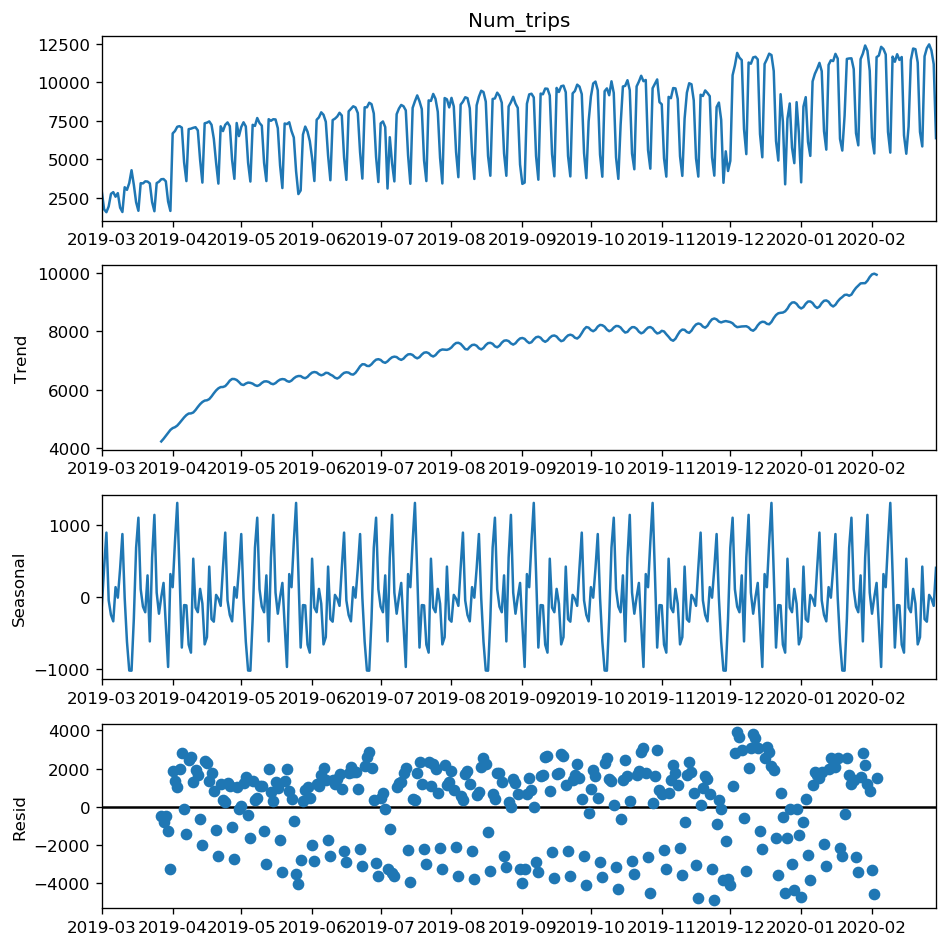

In [179]:
res = sm.tsa.seasonal_decompose(Daily['Num_trips'].iloc[:366], model='additive', freq=52) # period
res.plot()
plt.show()

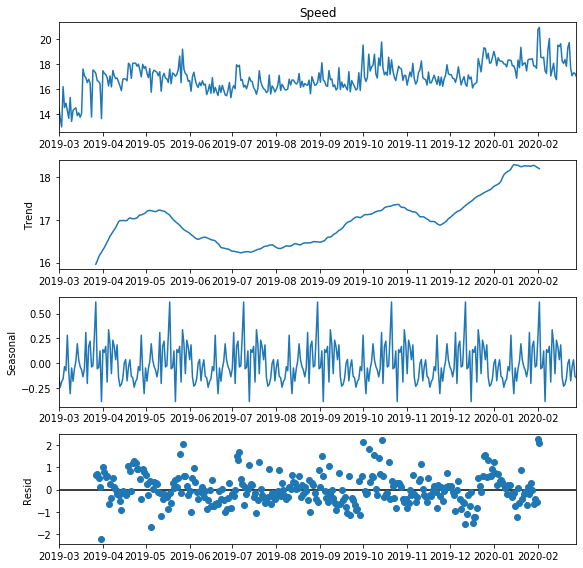

In [57]:
res = sm.tsa.seasonal_decompose(Daily['Speed'].iloc[35:400], model='additive', freq=52) # period
res.plot()
plt.show()

## ARIMA Models

To summarize, an ARIMA model is a class of statistical models for analyzing and forecasting time series data.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average(ARMA) and adds the notion of integration. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- **AR**: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- **I**: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- **MA**: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

- **d**: The number of times that the raw observations are differenced, also called the degree of differencing.
- **p**: The size of the moving average window, or the number of the moving average terms, also called the order of moving average.
- **q**: The number of AR terms included in the model, also called the lag order.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.

### try ARIMA model with daily speed data

#### Usr the adfuller tool to determine if the time series is stationary or not, $\alpha=0.05$. 

In [99]:
Daily = Daily[35:]

In [100]:
series = Daily['Speed']
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.727008
p-value: 0.417254
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


Since p-value>0.05, the time-series is not stationary.

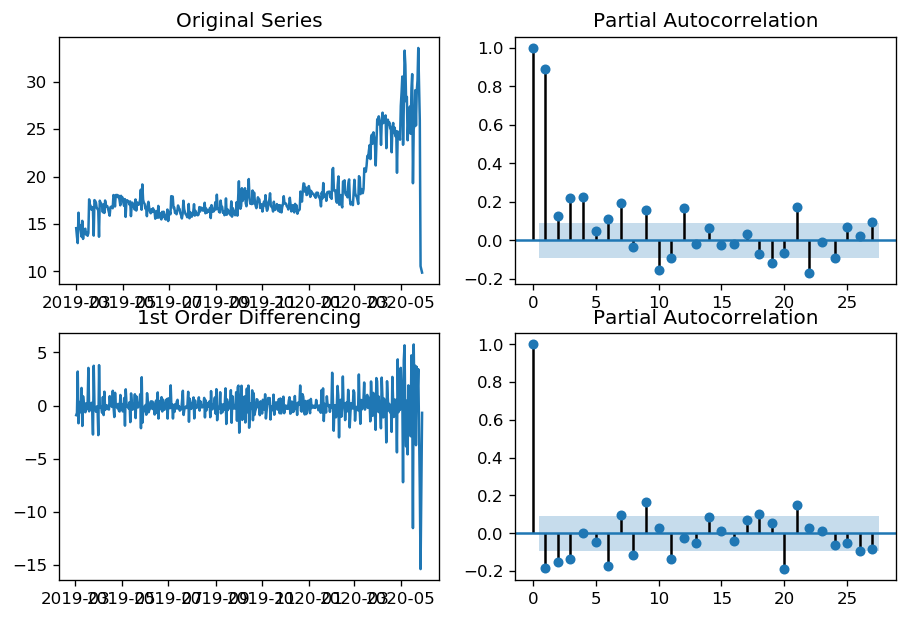

In [101]:
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(Daily['Speed']); axes[0, 0].set_title('Original Series')
plot_pacf(Daily['Speed'], ax=axes[0, 1]) # default alpha = 0.05
axes[0, 1].set_title('Partial Autocorrelation')
# 1st Differencing
axes[1, 0].plot(Daily['Speed'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(Daily['Speed'].diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')

plt.show()

In [102]:
print('1st order differencing')
series = Daily['Speed'].diff()
result = adfuller(series.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

1st order differencing
ADF Statistic: -2.543543
p-value: 0.105236


In [128]:
print('2st order differencing')
series = Daily['Speed'].diff().diff()
result = adfuller(series.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

2st order differencing
ADF Statistic: -8.135964
p-value: 0.000000


After differenced twice, p-value<0.05, the dataset is stationary. So d = 2.

#### Analyze the PACF and ACF plots to determine appropriate number of AR, MA terms

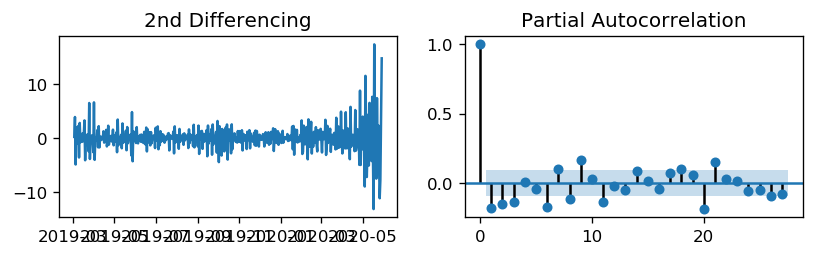

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(8,2))
axes[0].plot(Daily['Speed'].diff().diff())
axes[0].set_title('2nd Differencing')
plot_pacf(Daily['Speed'].diff().dropna(), ax=axes[1], alpha=0.05) 
plt.show()

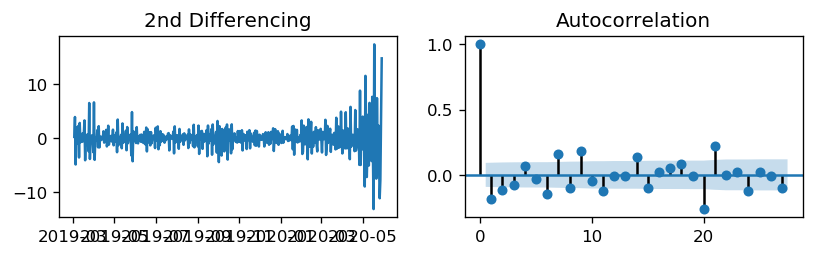

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(8,2))
axes[0].plot(Daily['Speed'].diff().diff())
axes[0].set_title('2nd Differencing')
plot_acf(Daily['Speed'].diff().dropna(), ax=axes[1], alpha=0.05)
plt.show()

Both PACF plot and ACF plot have sharp cutoffs after lag 1.  So we consider p = 1, q = 1.

### build up an ARIMA(1,1,1) model, train on Mar 2019- Feb 2020, test on Mar - May 2020. Check the autocorrelation and normal distribution hypothesis for the residuals.

In [144]:
Daily.index[:366]

Index([2019-03-01, 2019-03-02, 2019-03-03, 2019-03-04, 2019-03-05, 2019-03-06,
       2019-03-07, 2019-03-08, 2019-03-09, 2019-03-10,
       ...
       2020-02-20, 2020-02-21, 2020-02-22, 2020-02-23, 2020-02-24, 2020-02-25,
       2020-02-26, 2020-02-27, 2020-02-28, 2020-02-29],
      dtype='object', name='Date', length=366)

In [145]:
len(Daily)

454

                             ARIMA Model Results                              
Dep. Variable:               D2.Speed   No. Observations:                  364
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -457.412
Method:                       css-mle   S.D. of innovations              0.842
Date:                Thu, 18 Mar 2021   AIC                            922.824
Time:                        09:58:01   BIC                            938.413
Sample:                    03-03-2019   HQIC                           929.020
                         - 02-29-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.225e-05      0.000     -0.242      0.809      -0.001       0.001
ar.L1.D2.Speed    -0.4059      0.048     -8.447      0.000      -0.500      -0.312
ma.L1.D2.Speed    -1.0000      0.007

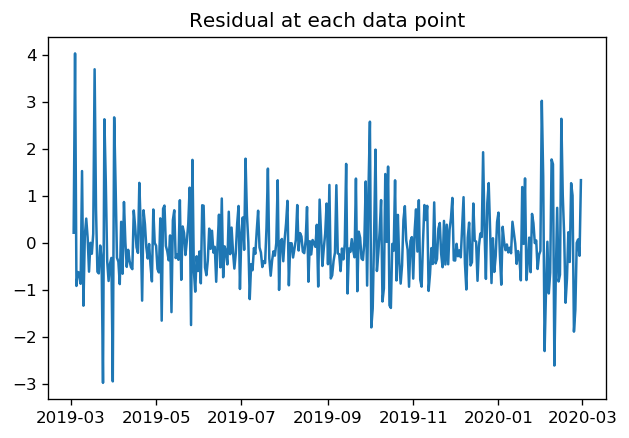

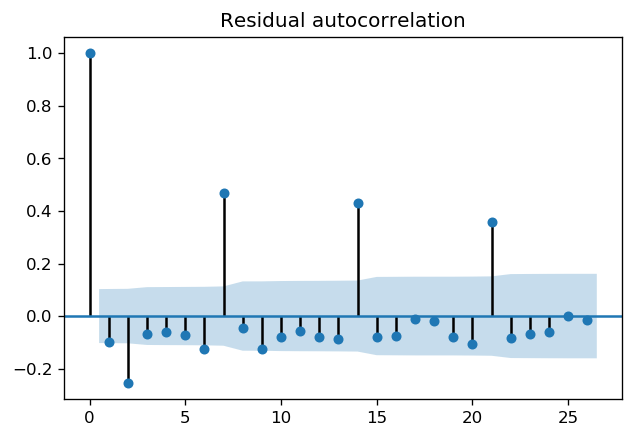

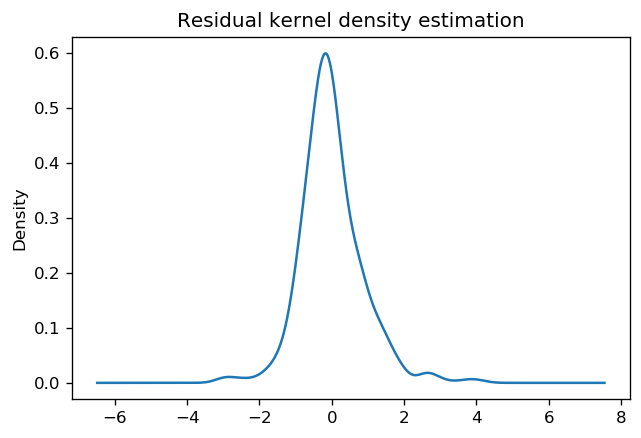

                0
count  364.000000
mean    -0.001906
std      0.861834
min     -2.980755
25%     -0.464823
50%     -0.107146
75%      0.399880
max      4.035232
p value is  1.335143853587432e-13
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected


In [146]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

P=1
D=2
Q=1

# fit model
N=366  
series = Daily['Speed']
model = ARIMA(series[:N], order=(Q,D,P))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize = (6,4))
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.05
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

In [147]:
### a function for grading
def outputResults(adfuller_p_value, fitted_arima_model, residual_normaltest_p_value):
    import csv
    '''
    please pass your argument in this function
    adfuller_p_value: the p value of the stationary series from adfuller test;
    fitted_arima_model: your fitted ARIMA model;
    residual_normaltest_p_value: the normal test's p value of residual from ARIMA model
    '''
    if type(adfuller_p_value) == np.ndarray:
        adfuller_p_value = adfuller_p_value[0]
    if type(residual_normaltest_p_value) == np.ndarray:
        residual_normaltest_p_value = residual_normaltest_p_value[0]
    with open('output.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['adfuller','AIC','normaltest'])
        writer.writerow([adfuller_p_value, fitted_arima_model.aic, residual_normaltest_p_value])
        print('Output Saved:\n  adfuller p-value: %0.6f\n  fitted ARIMA AIC: %0.6f\n  normal test p-value: %0.6f' % (adfuller_p_value, fitted_arima_model.aic, residual_normaltest_p_value))

In [148]:
outputResults(0.000000, model_fit, 0.000000)

Output Saved:
  adfuller p-value: 0.000000
  fitted ARIMA AIC: 922.824495
  normal test p-value: 0.000000


In [149]:
# Forecast and MAE test
fc, se, conf = model_fit.forecast(steps = len(series)-N, alpha = 0.05)
fc_series = pd.Series(fc, index = range(N,len(series)))
print('ARIMA model out-of-sample MAE', mean_absolute_error(series[N:], fc_series))

ARIMA model out-of-sample MAE 6.661142688404261


### visualize test, train, in-sample prediction and out-of-sample datasets in one plot.

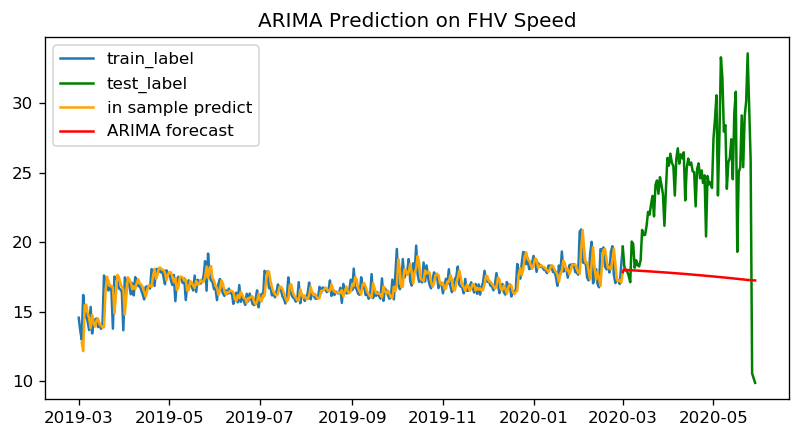

In [154]:
plt.figure(figsize = (8,4))
plt.title('ARIMA Prediction on FHV Speed')
plt.plot(Daily['Speed'].iloc[:N+1], label = 'train_label')
plt.plot(Daily.index[N:], Daily['Speed'].iloc[N:], color='green', label = 'test_label')
plt.plot(Daily.index[2:N+2], model_fit.predict(start=2, end=N+1, dynamic=False, typ='levels'), color='orange', label='in sample predict')
plt.plot(Daily.index[N:], fc_series.values, label='ARIMA forecast', color='red')

plt.legend(loc='upper left')

### try ARIMA model with daily Num of Trips data

In [157]:
series = Daily['Num_trips']
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.232790
p-value: 0.659334
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [156]:
print('1st order differencing')
series = Daily['Num_trips'].diff()
result = adfuller(series.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

1st order differencing
ADF Statistic: -5.901673
p-value: 0.000000


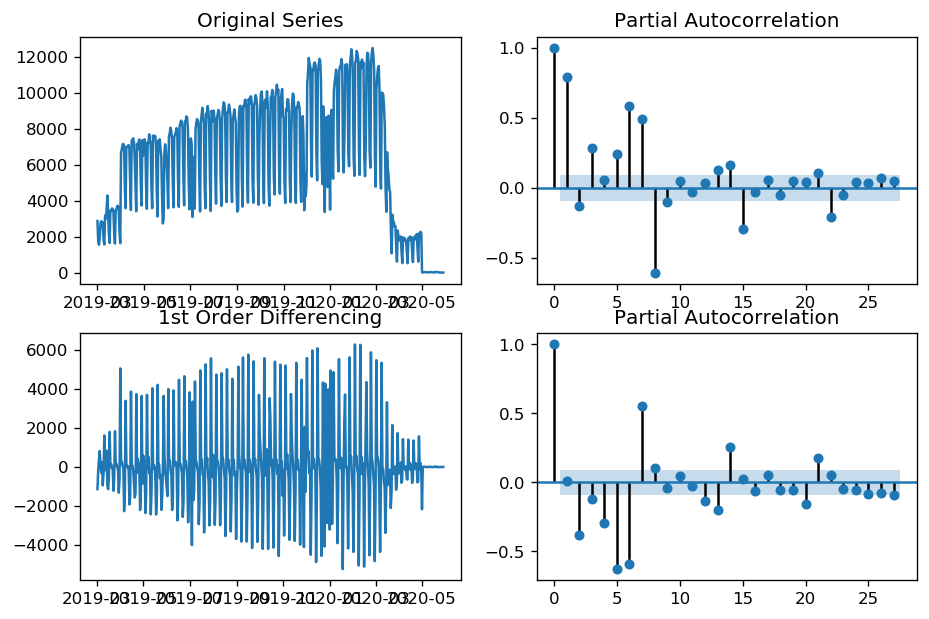

In [158]:
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(Daily['Num_trips']); axes[0, 0].set_title('Original Series')
plot_pacf(Daily['Num_trips'], ax=axes[0, 1]) # default alpha = 0.05
axes[0, 1].set_title('Partial Autocorrelation')
# 1st Differencing
axes[1, 0].plot(Daily['Num_trips'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(Daily['Num_trips'].diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')

plt.show()

According to the PACF plot and ACF plot, we consider p = 2, q = 1.

                             ARIMA Model Results                              
Dep. Variable:            D.Num_trips   No. Observations:                  365
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3272.179
Method:                       css-mle   S.D. of innovations           1886.478
Date:                Thu, 18 Mar 2021   AIC                           6554.359
Time:                        10:24:37   BIC                           6573.858
Sample:                    03-02-2019   HQIC                          6562.108
                         - 02-29-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.1644      4.979      3.448      0.001       7.407      26.922
ar.L1.D.Num_trips     0.0543      0.096      0.566      0.572      -0.134       0.242
ma.L1.D.Num_trips    -0.

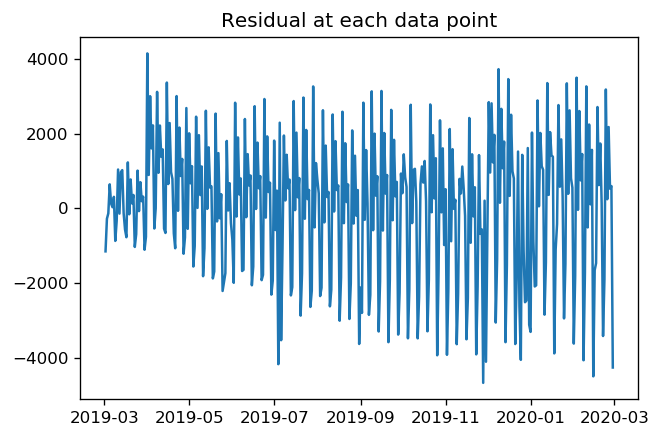

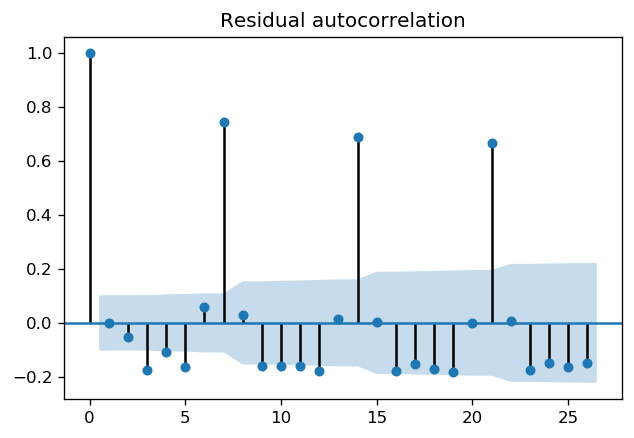

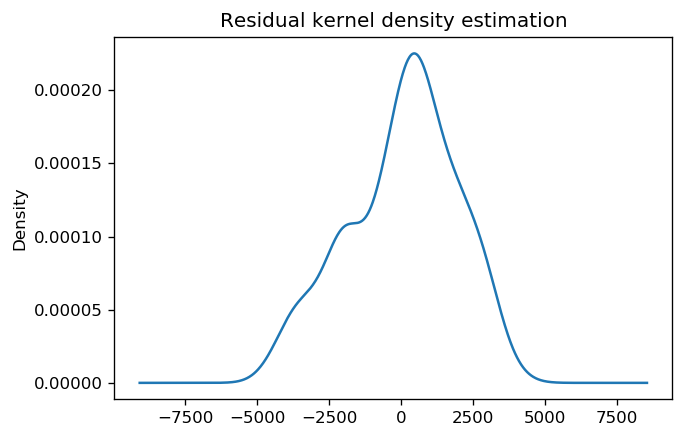

                 0
count   365.000000
mean     56.209908
std    1889.567201
min   -4673.555081
25%   -1153.164416
50%     311.866014
75%    1430.992884
max    4146.383015
p value is  0.0008294435923082754
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected


In [163]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

P=2
D=1
Q=1

# fit model
N=366  
series = Daily['Num_trips']
model = ARIMA(series[:N], order=(Q,D,P))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize = (6,4))
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.05
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

In [164]:
outputResults(0.000000, model_fit, 0.000829)

Output Saved:
  adfuller p-value: 0.000000
  fitted ARIMA AIC: 6554.358646
  normal test p-value: 0.000829


In [165]:
# Forecast and MAE test
fc, se, conf = model_fit.forecast(steps = len(series)-N, alpha = 0.05)
fc_series = pd.Series(fc, index = range(N,len(series)))
print('ARIMA model out-of-sample MAE', mean_absolute_error(series[N:], fc_series))

ARIMA model out-of-sample MAE 8299.541112013969


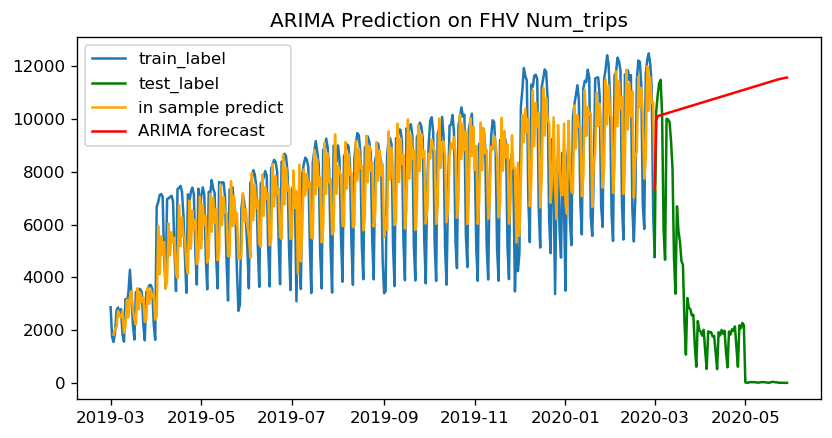

In [168]:
plt.figure(figsize = (8,4))
plt.title('ARIMA Prediction on FHV Num_trips')
plt.plot(Daily['Num_trips'].iloc[:N+1], label = 'train_label')
plt.plot(Daily.index[N:], Daily['Num_trips'].iloc[N:], color='green', label = 'test_label')
plt.plot(Daily.index[2:N+2], model_fit.predict(start=2, end=N+1, dynamic=False, typ='levels'), color='orange', label='in sample predict')
plt.plot(Daily.index[N:], fc_series.values, label='ARIMA forecast', color='red')

plt.legend(loc='upper left')